In [1]:
!pip install sensormotion

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sensormotion: filename=sensormotion-1.1.4-py3-none-any.whl size=19658 sha256=9f0d699ff5e07ad6fde04b90c8046f2e60e4974ba66d415a23316d9a2b6b9866
  Stored in directory: /root/.cache/pip/wheels/a2/a1/d6/d7229aff17b9a309282d830747f636814a3523178f171c7ffd
Successfully built sensormotion


In [2]:
"""
Matplotlib plotting functions.

Convenience wrappers around common matplotlib pyplot plot calls. This module
simplifies the creation of filter frequency response curves and general
signal plots over time.
"""

from __future__ import print_function, division

import matplotlib.pyplot as plt
import numpy as np
import sensormotion.signal

from scipy.signal import freqz


def plot_filter_response(
    frequency,
    sample_rate,
    filter_type,
    filter_order=2,
    show_grid=True,
    fig_size=(10, 5),
):
    """Plot filter frequency response.

    Generate a plot showing the frequency response curve of a filter with the
    specified parameters.

    Parameters
    ----------
    frequency : int or tuple of ints
        The cutoff frequency for the filter. If `filter_type` is set as
        'bandpass' then this needs to be a tuple of integers representing
        the lower and upper bound frequencies. For example, for a bandpass
        filter with range of 2Hz and 10Hz, you would pass in the tuple (2, 10).
        For filter types with a single cutoff frequency then a single integer
        should be used.
    sample_rate : float
        Sampling rate of the signal.
    filter_type : {'lowpass', 'highpass', 'bandpass', 'bandstop'}
        Type of filter to build.
    filter_order: int, optional
        Order of the filter.
    show_grid : bool, optional
        Toggle to show grid lines on the plot.
    fig_size : tuple, optional
        Tuple containing the width and height of the resulting figure.
    """

    b, a = sensormotion.signal.build_filter(
        frequency, sample_rate, filter_type, filter_order
    )

    # Plot the frequency response
    w, h = freqz(b, a, worN=8000)
    f, axarr = plt.subplots(figsize=fig_size)
    axarr.plot(0.5 * sample_rate * w / np.pi, np.abs(h), "b")
    axarr.set_xlim(0, 0.5 * sample_rate)
    axarr.set_xlabel("Frequency (Hz)")
    axarr.grid(show_grid)

    # Add lines and markers at the cutoff frequency/frequencies
    if filter_type == "bandpass":
        for i in range(len(frequency)):
            axarr.axvline(frequency[i], color="k")
            axarr.plot(frequency[i], 0.5 * np.sqrt(2), "ko")
    else:
        axarr.axvline(frequency, color="k")
        axarr.plot(frequency, 0.5 * np.sqrt(2), "ko")

    plt.suptitle("Filter Frequency Response", size=16)
    plt.show()


def plot_signal(
    time,
    signal,
    title="",
    xlab="",
    ylab="",
    line_width=1,
    alpha=1,
    color="k",
    subplots=False,
    show_grid=True,
    fig_size=(10, 5),
):
    """Plot signals over time.

    Convenience wrapper around pyplot to quickly create plots of signals
    over time. This is useful if you want to avoid remembering the syntax
    for matplotlib.

    Parameters
    ----------
    time : ndarray
        Time vector of the signal (X-axis)
    signal : ndarray or list of dicts
        If plotting a single line, you can pass in a single array.

        If you want to plot multiple lines (either on the same plot, or as
        subplots) you should pass in a list of dictionaries. Each dictionary
        represents a separate line and contains options for that line. The
        dictionary can hold the follow keys: 'data' (required), 'label',
        'color', 'alpha', 'line_width'.

        For example, a 2 line plot can be created like this:

        >>> plot.plot_signal(time_array, [{'data': line1_data,
                                           'label': 'line 1',
                                           'color': 'b'},
                                          {'data': line2_data,
                                           'label': 'second line',
                                           'line_Width': 4}])
    title : str, optional
        Title of the plot.
    xlab : str, optional
        Label for the x axis.
    ylab : str, optional
        Label for the y axis.
    line_width : int or float, optional
        Width of the plot lines.
    alpha : int or float, optional
        Alpha of the plot lines.
    color : str, optional
        Colour of the plot lines. Receives a string following the matplotlib
        colors API: http://matplotlib.org/api/colors_api.html
    subplots : bool, optional
        If multiple lines are passed in, should they be displayed on the same
        plot (False)? Or should each be displayed in separate subplots (True)?
    show_grid : bool, optional
        Toggle to display grid lines on the plot.
    fig_size : tuple, optional
        Set the figure size of the resulting plot.
    """

    if type(signal) == list:  # Multiple lines to be plotted
        if subplots:
            f, axarr = plt.subplots(len(signal), 1, figsize=fig_size)
        else:
            f, axarr = plt.subplots(figsize=fig_size)

        for i, line in enumerate(signal):  # Iterate through each plot line
            cur_data = line["data"]

            # Get options for the current line
            try:
                cur_label = line["label"]
            except KeyError:
                print("Warning: Label missing for signal")
                cur_label = ""
            try:
                cur_color = line["color"]
            except KeyError:
                cur_color = color
            try:
                cur_alpha = line["alpha"]
            except KeyError:
                cur_alpha = alpha
            try:
                cur_linewidth = line["line_width"]
            except KeyError:
                cur_linewidth = line_width

            if subplots:  # Show lines in separate plots, in the same figure
                axarr[i].plot(
                    time,
                    cur_data,
                    label=cur_label,
                    linewidth=cur_linewidth,
                    alpha=cur_alpha,
                    color=cur_color,
                )

                axarr[i].set_xlim(min(time), max(time))
                axarr[i].set_xlabel(xlab)
                axarr[i].set_ylabel(ylab)
                axarr[i].grid(show_grid)
                axarr[i].legend()
                f.subplots_adjust(hspace=0.5)
            else:  # Show all lines on the same plot
                axarr.plot(
                    time,
                    cur_data,
                    label=cur_label,
                    linewidth=cur_linewidth,
                    alpha=cur_alpha,
                    color=cur_color,
                )

                axarr.set_xlim(min(time), max(time))
                axarr.set_xlabel(xlab)
                axarr.set_ylabel(ylab)
                axarr.grid(show_grid)
                axarr.legend()
    else:  # Single line plot
        f, axarr = plt.subplots(figsize=fig_size)
        axarr.plot(time, signal, linewidth=line_width, alpha=alpha, color=color)
        axarr.set_xlim(min(time), max(time))
        axarr.set_xlabel(xlab)
        axarr.set_ylabel(ylab)
        axarr.grid(show_grid)

    plt.suptitle(title, size=16)
    plt.show()

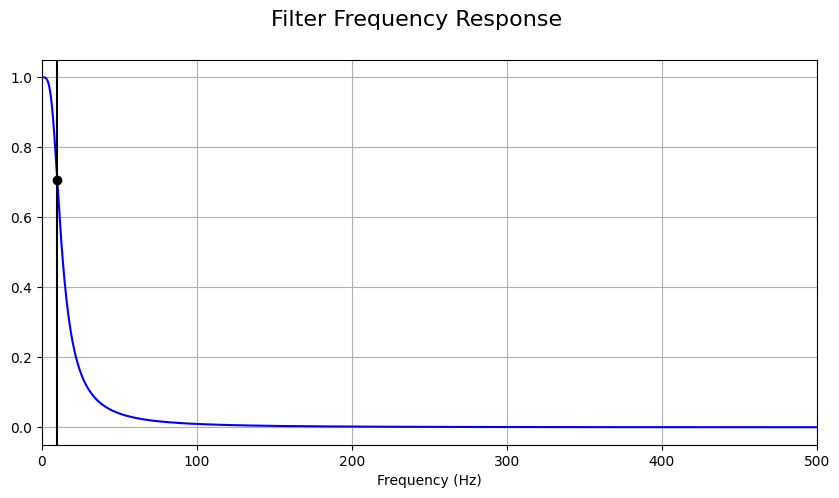

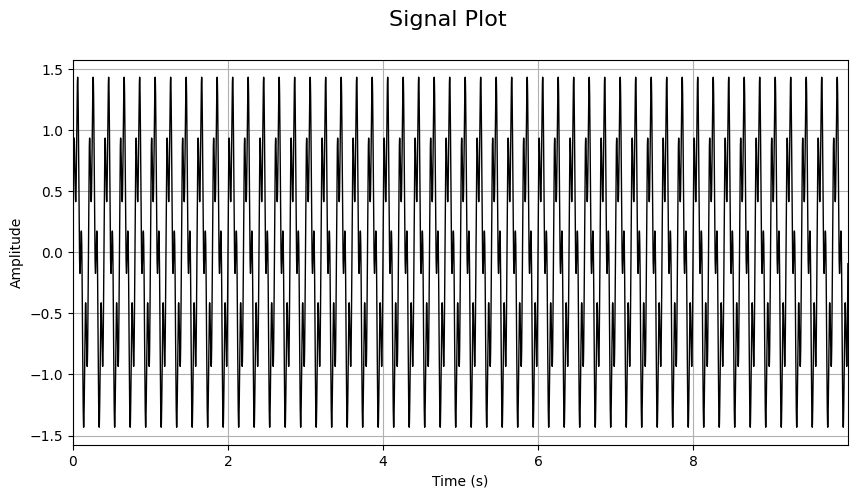

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sensormotion.plot

# Generate example data
sample_rate = 1000  # Hz
time = np.arange(0, 10, 1 / sample_rate)
signal = np.sin(2 * np.pi * 5 * time) + 0.5 * np.sin(2 * np.pi * 20 * time)

# Plot filter response
frequency = 10  # Cutoff frequency in Hz
filter_type = 'lowpass'
sensormotion.plot.plot_filter_response(frequency, sample_rate, filter_type)

# Plot signal
sensormotion.plot.plot_signal(time, signal, title='Signal Plot', xlab='Time (s)', ylab='Amplitude')

